# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+SPIRE_xFLS_cat.fits')


In [3]:
SWIRE_cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J172157.292+582747.401,260.48871547709,58.4631669127439,2.9696317,5.6648793,1.0400287,1.5786674,3.5926533,0.4396795,1.2172914,3.2236161,0.3057396,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.998574,0.9992676,0.9999199,2000.0,2000.0,2000.0,0.0,0.025,0.012
HELP_J172156.521+582733.179,260.48550221309,58.4592162607439,1.7669533,3.8513484,0.4803082,4.2408266,7.4633527,1.6634052,1.5063568,3.5600753,0.3381244,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.99911183,0.9989502,0.9983664,2000.0,2000.0,2000.0,0.0,0.037,0.002
HELP_J172158.112+582657.669,260.49213396009,58.4493524757439,4.4026012,7.1168995,1.9746294,2.1668115,4.322948,0.653926,1.5583377,3.5770295,0.4576329,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,1.00077,0.99898684,0.9992252,2000.0,2000.0,2000.0,0.0,0.027,0.016
HELP_J172154.937+582622.555,260.47890287109,58.4395985157439,0.95452565,2.3896708,0.27079415,1.0074254,2.4805608,0.28458935,1.4042114,3.4215322,0.38045743,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.9986912,0.99869645,0.99829143,2000.0,2000.0,2000.0,0.005,0.049,0.023
HELP_J172153.735+582618.703,260.47389745309,58.4385287057439,0.7662039,2.0464175,0.18155524,0.9723862,2.4166346,0.2473,1.3806076,3.223361,0.3685337,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.9985655,1.0001334,1.000274,2000.0,2000.0,2000.0,0.003,0.026,0.01
HELP_J172142.924+582727.539,260.42885043009,58.4576498397439,0.5684522,1.4030447,0.15043467,0.5933348,1.5354067,0.14685969,0.85264176,2.0521953,0.21546575,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.99908215,0.99870867,1.0010515,2000.0,2000.0,2000.0,0.007,0.077,0.085
HELP_J172136.891+582711.906,260.40371420709,58.4533073197439,1.7171786,3.6524806,0.52124417,0.80294216,2.0205607,0.20997918,0.8622216,2.154632,0.23235,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,0.9984857,0.9997041,0.99874645,2000.0,2000.0,2000.0,0.001,0.083,0.087
HELP_J172143.470+582718.572,260.43112417609,58.4551589077439,0.47816187,1.2484623,0.13288462,0.5095024,1.3467567,0.12592264,0.81633013,2.2394173,0.19830582,-3.2521532,-5.155283,-5.8136015,3.6772091,4.174176,4.482718,1.0002974,0.99912816,0.99867433,2000.0,2000.0,2000.0,0.004,0.074,0.075


## Look at Symmetry of PDFs to determine depth level of catalogue

/home/mc741/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


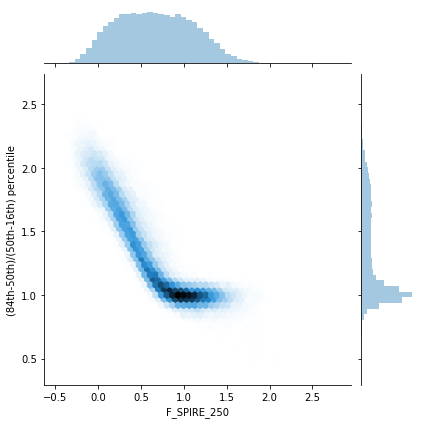

In [5]:
skew=(SWIRE_cat['FErr_SPIRE_250_u']-SWIRE_cat['F_SPIRE_250'])/(SWIRE_cat['F_SPIRE_250']-SWIRE_cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_250']),y=skew, kind='hex')

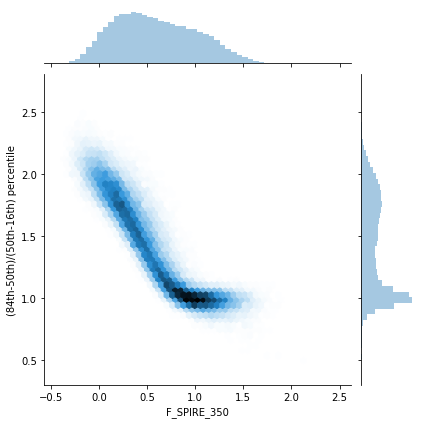

In [6]:
skew=(SWIRE_cat['FErr_SPIRE_350_u']-SWIRE_cat['F_SPIRE_350'])/(SWIRE_cat['F_SPIRE_350']-SWIRE_cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_350']),y=skew, kind='hex')

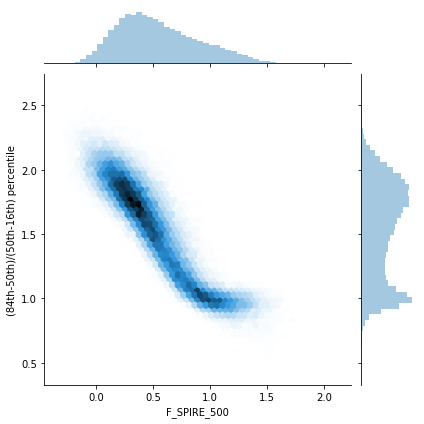

In [7]:
skew=(SWIRE_cat['FErr_SPIRE_500_u']-SWIRE_cat['F_SPIRE_500'])/(SWIRE_cat['F_SPIRE_500']-SWIRE_cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [8]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_250'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_350'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_500'))

In [9]:
ind_SWIRE_250=(SWIRE_cat['Pval_res_250']>0.5) | (SWIRE_cat['F_SPIRE_250'] < 4)
ind_SWIRE_350=(SWIRE_cat['Pval_res_350']>0.5) | (SWIRE_cat['F_SPIRE_350'] < 4)
ind_SWIRE_500=(SWIRE_cat['Pval_res_500']>0.5) | (SWIRE_cat['F_SPIRE_500'] < 4)


In [10]:
print(ind_SWIRE_250.sum(),ind_SWIRE_350.sum(),ind_SWIRE_500.sum(),len(SWIRE_cat))

26468 31392 32527 52187


In [11]:
SWIRE_cat['flag_spire_250'][ind_SWIRE_250]=True
SWIRE_cat['flag_spire_350'][ind_SWIRE_350]=True
SWIRE_cat['flag_spire_500'][ind_SWIRE_500]=True

In [12]:
SWIRE_cat.write('./data/dmu26_XID+SPIRE_xFLS_cat_20190123.fits', format='fits',overwrite=True)
